In [74]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [75]:
lisbon_house_prices = fetch_openml('Lisbon-House-Prices', version=1, parser='auto')

In [76]:
X_price = lisbon_house_prices.data
y_price = lisbon_house_prices.target

In [77]:
# Initialize all data as pandas dataframe
df_price = X_price.join(y_price) 

# Data study and feature engineer

In [78]:
display(X_price.join(y_price))

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price_M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,'Sao Domingos de Benfica',3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,'For Refurbishment',Homes,Apartment,2,1,66,132,0,38.7460,-9.1769,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,'For Refurbishment',Homes,Apartment,3,1,75,150,0,38.7177,-9.1341,Portugal,Lisboa,Lisboa,'Santa Maria Maior',4807,245000
243,348,'For Refurbishment','Single Habitation','Townhouse Dwelling',2,1,90,180,0,38.7694,-9.1138,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,'For Refurbishment','Single Habitation',Dwelling,4,3,121,242,0,38.7030,-9.2044,Portugal,Lisboa,Lisboa,Belem,3542,375000


In [79]:
X_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               246 non-null    int64  
 1   Condition        246 non-null    object 
 2   PropertyType     246 non-null    object 
 3   PropertySubType  246 non-null    object 
 4   Bedrooms         246 non-null    int64  
 5   Bathrooms        246 non-null    int64  
 6   AreaNet          246 non-null    int64  
 7   AreaGross        246 non-null    int64  
 8   Parking          246 non-null    int64  
 9   Latitude         246 non-null    float64
 10  Longitude        246 non-null    float64
 11  Country          246 non-null    object 
 12  District         246 non-null    object 
 13  Municipality     246 non-null    object 
 14  Parish           246 non-null    object 
 15  Price_M2         246 non-null    int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 30.9+ KB


In [80]:
y_price.info()

<class 'pandas.core.series.Series'>
RangeIndex: 246 entries, 0 to 245
Series name: Price
Non-Null Count  Dtype
--------------  -----
246 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


In [81]:
display(X_price.describe())

,Id,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Price_M2
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000
mean,226.670732,2.491870,1.845528,109.662602,219.325203,0.154472,38.733106,-9.140051,3487.873984
std,72.308419,1.354484,1.034369,66.261664,132.523328,0.503579,0.020778,0.032356,715.896079
min,101.000000,0.000000,0.000000,23.000000,46.000000,0.000000,38.696300,-9.224400,2393.000000
25%,166.250000,2.000000,1.000000,64.250000,128.500000,0.000000,38.716900,-9.160700,2881.000000
50%,227.500000,2.000000,2.000000,90.000000,180.000000,0.000000,38.730050,-9.136800,3402.000000
75%,288.750000,3.000000,2.000000,145.000000,290.000000,0.000000,38.745800,-9.113575,3859.000000
max,350.000000,11.000000,6.000000,573.000000,1146.000000,3.000000,38.789900,-9.093800,5340.000000


In [82]:
# Categorical values to numerical form with label encoder
le = LabelEncoder()
cols_to_encode=[1, 2, 3]
for i in range(len(cols_to_encode)):
    df_price.iloc[:,cols_to_encode[i]] = le.fit_transform(df_price.iloc[:,cols_to_encode[i]])

<IPython.core.display.Javascript object>

In [83]:
display(df_price)

,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price_M2,Price
0,101,3,1,3,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,3,1,4,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,3,1,3,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,3,1,3,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,'Sao Domingos de Benfica',3412,995000
4,105,3,1,3,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,346,1,1,3,2,1,66,132,0,38.7460,-9.1769,Portugal,Lisboa,Lisboa,Benfica,2727,196500
242,347,1,1,3,3,1,75,150,0,38.7177,-9.1341,Portugal,Lisboa,Lisboa,'Santa Maria Maior',4807,245000
243,348,1,0,2,2,1,90,180,0,38.7694,-9.1138,Portugal,Lisboa,Lisboa,Olivais,2463,486000
244,349,1,0,5,4,3,121,242,0,38.7030,-9.2044,Portugal,Lisboa,Lisboa,Belem,3542,375000


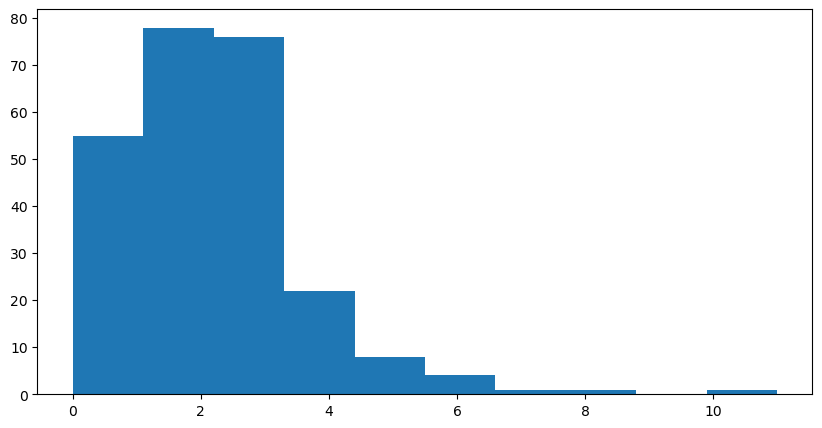

In [84]:
plt.figure(figsize=(10,5))
plt.hist(X_price['Bedrooms'])
plt.show()

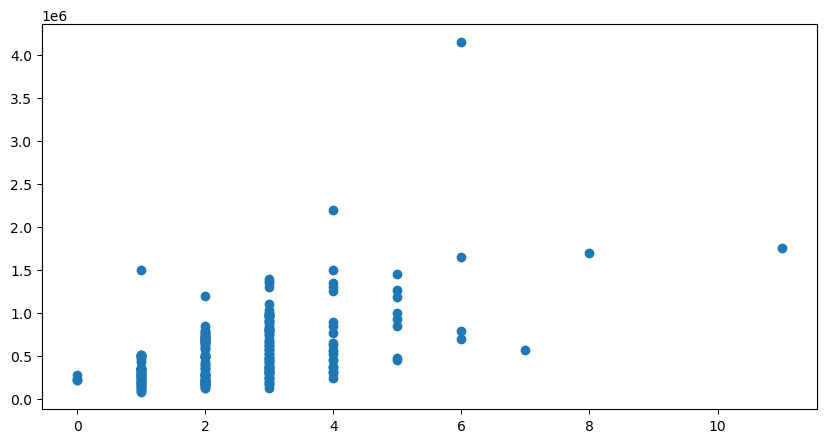

In [85]:
plt.figure(figsize=(10, 5))
plt.scatter(df_price['Bedrooms'], df_price['Price'])
plt.show()

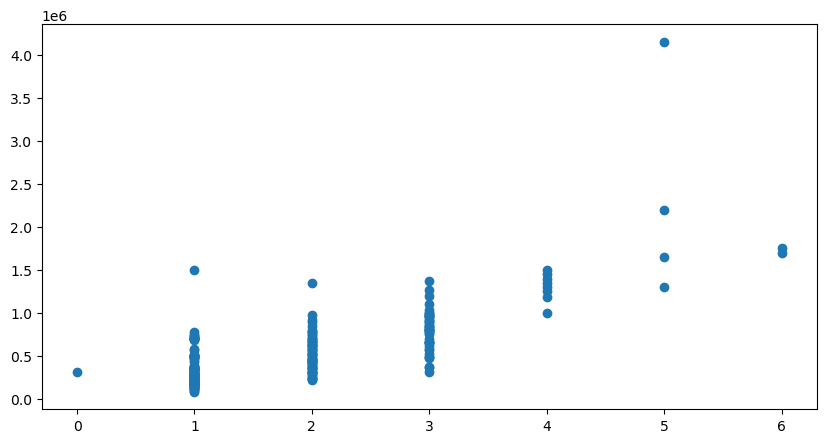

In [86]:
plt.figure(figsize=(10, 5))
plt.scatter(df_price['Bathrooms'], df_price['Price'])
plt.show()

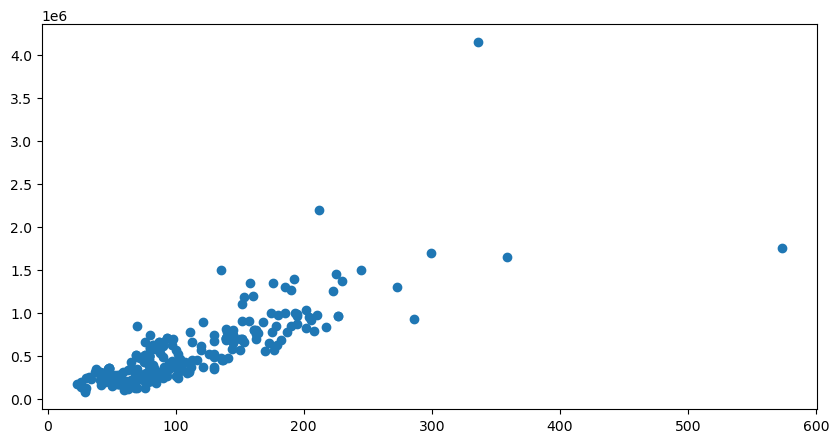

In [87]:
plt.figure(figsize=(10, 5))
plt.scatter(df_price['AreaNet'], df_price['Price'])
plt.show()

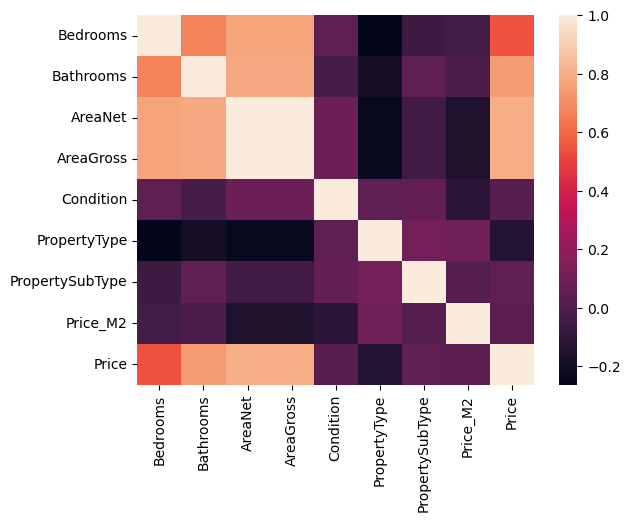

In [88]:
sns.heatmap(df_price[['Bedrooms','Bathrooms','AreaNet',
                      'AreaGross','Condition','PropertyType',
                      'PropertySubType','Price_M2','Price']].corr());

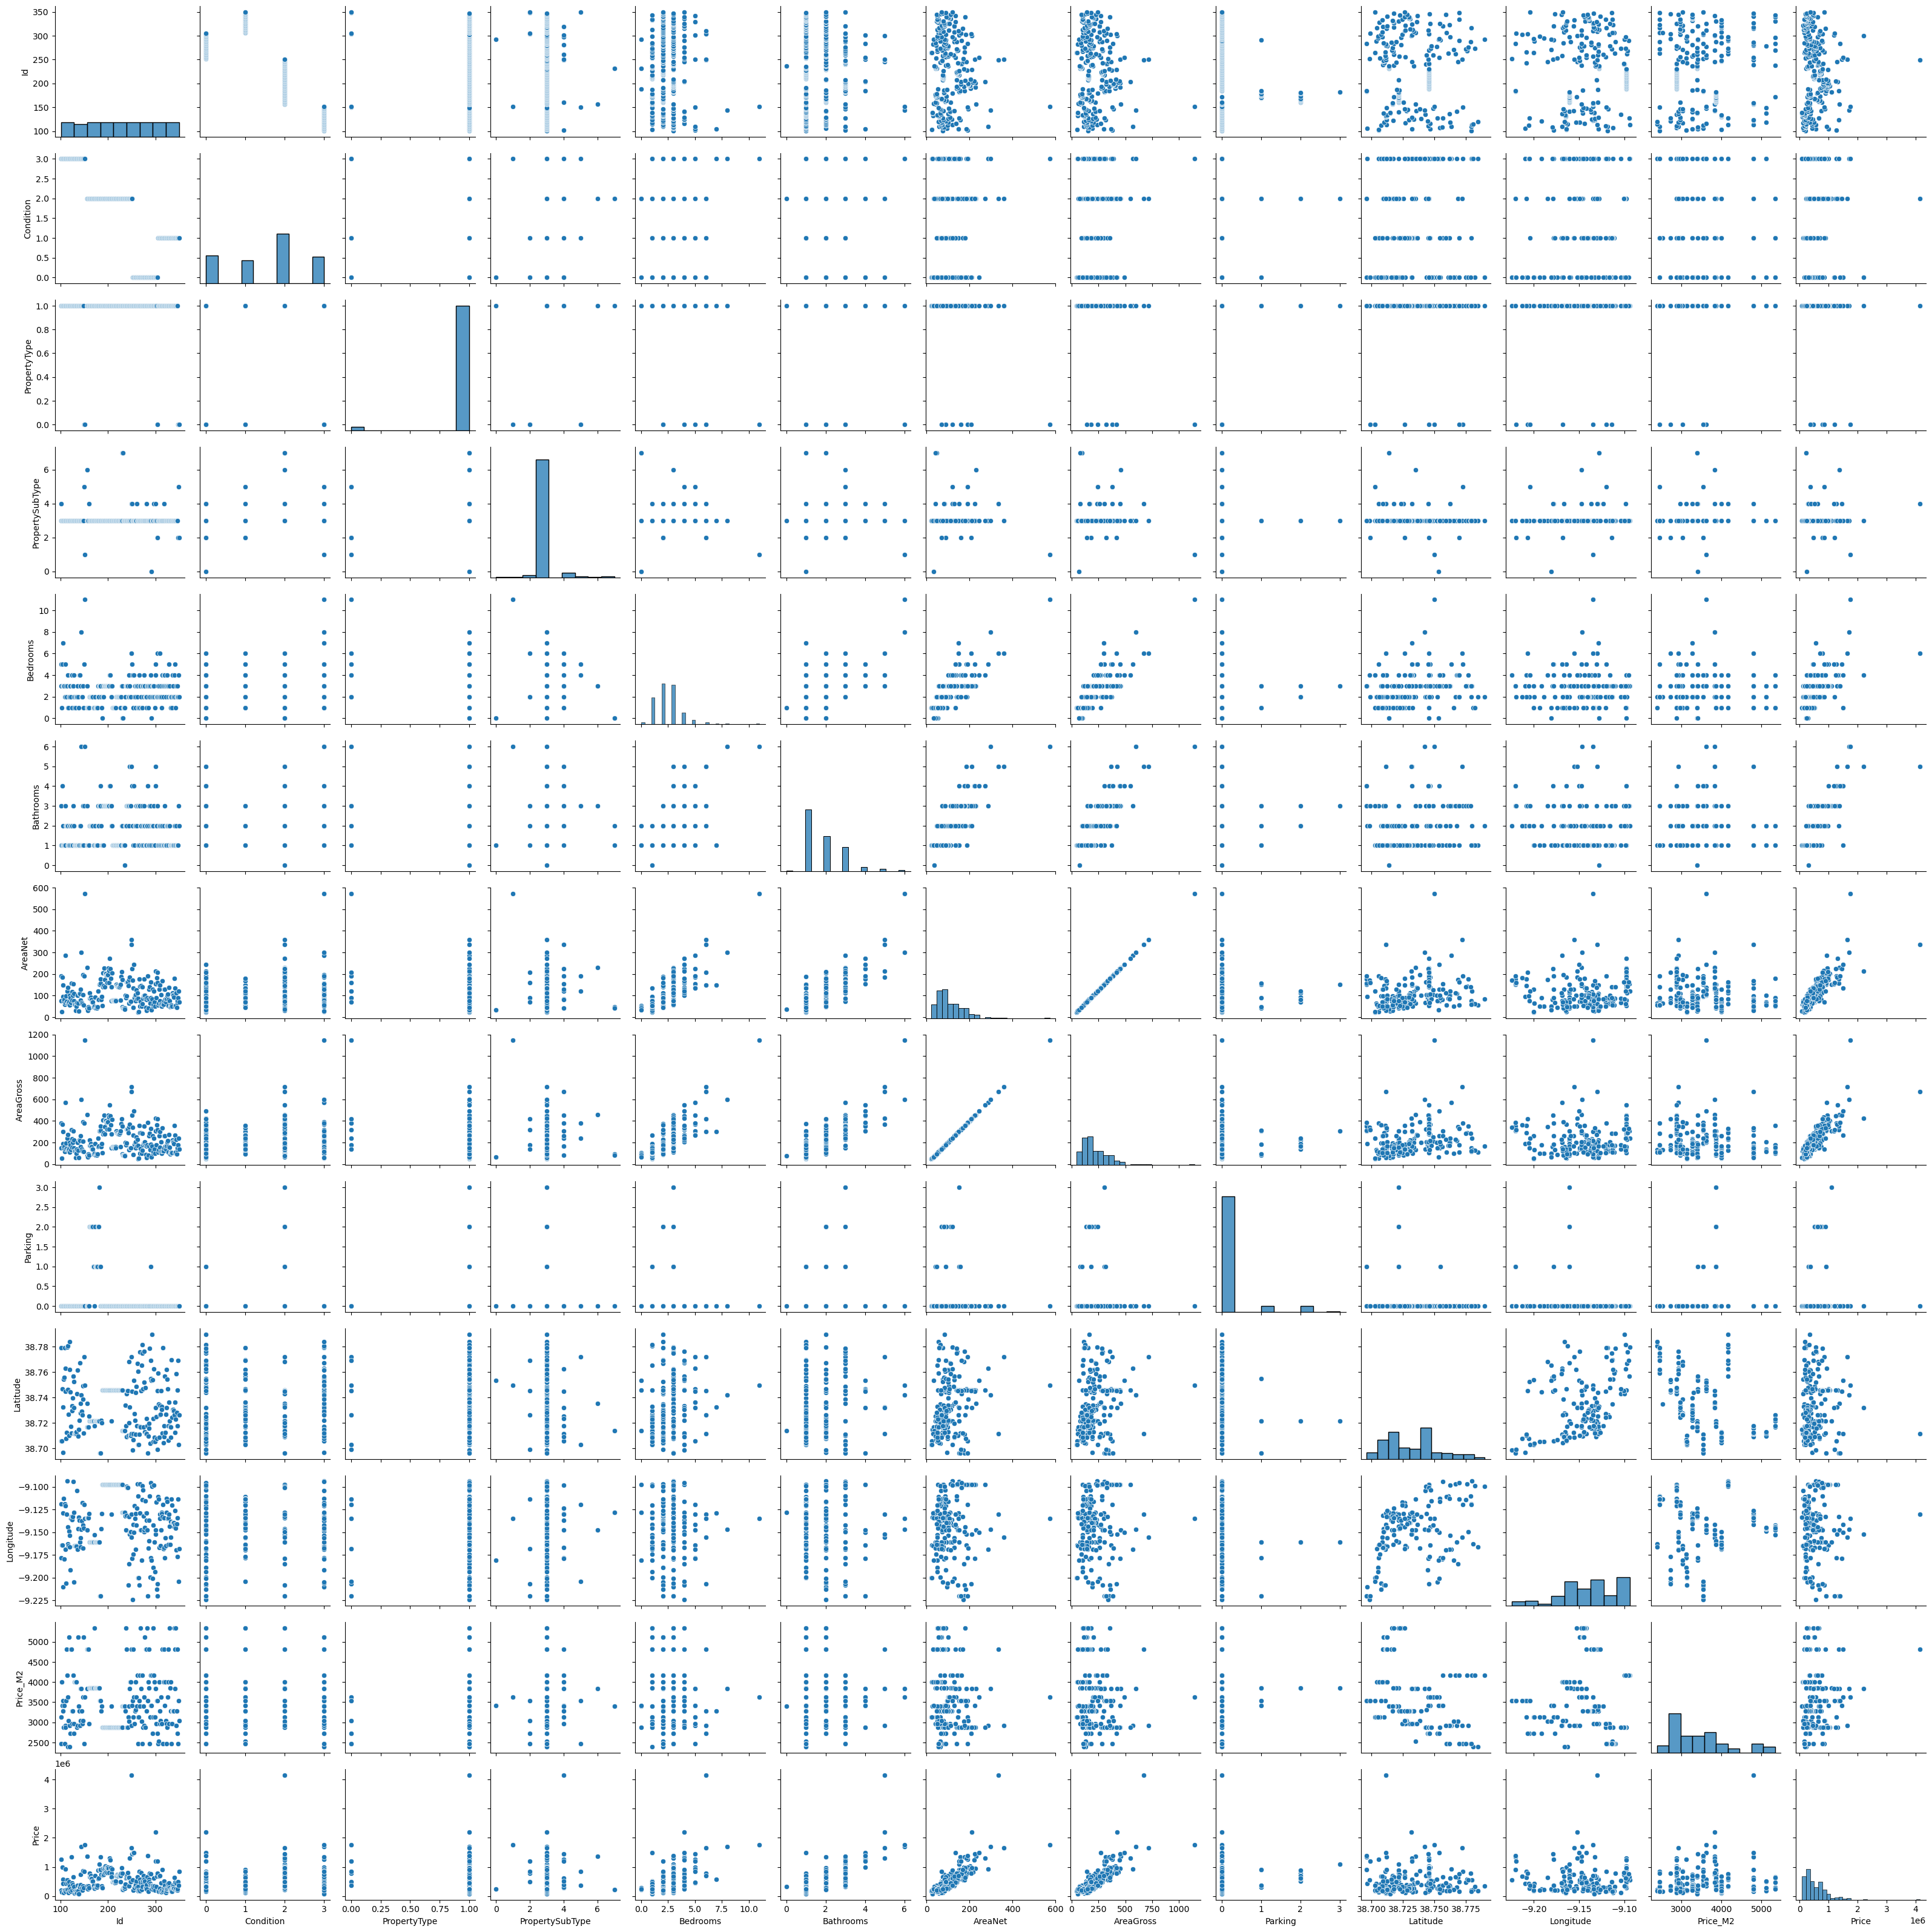

In [89]:
sns.pairplot(df_price);

# Data preprocessing

In [90]:
X_price = df_price[['Bedrooms','Bathrooms','AreaNet','AreaGross']]
y_price = df_price['Price']

In [91]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_price, y_price, test_size=0.25, shuffle=True, random_state=42)

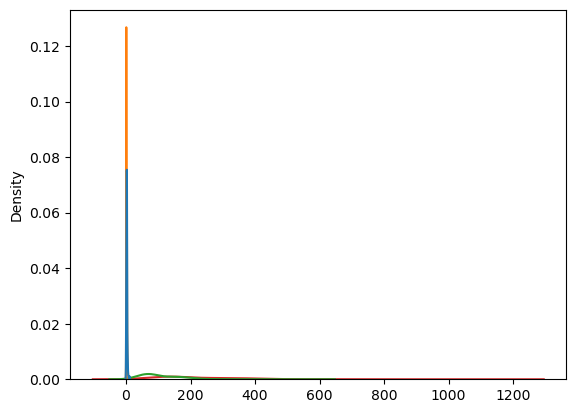

In [92]:
# Data density before normalization
plt.figure()
sns.kdeplot(X_train, legend=None)
plt.show()

In [93]:
#Normalization, z-score
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

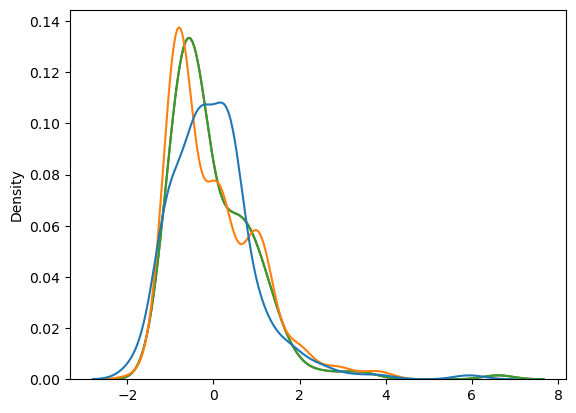

In [94]:
# Data density after normalization
plt.figure()
sns.kdeplot(X_train, legend=None)
plt.show()

# HoldOut cross-validation

# Model training

In [95]:
# Initialize model 
linear_model = LinearRegression()

In [96]:
# Train model
linear_model.fit(X_train, y_train)

LinearRegression()

# Model testing

In [97]:
# Model mean accuracy with test data
print(linear_model.score(X_test, y_test))

0.5331859135094109


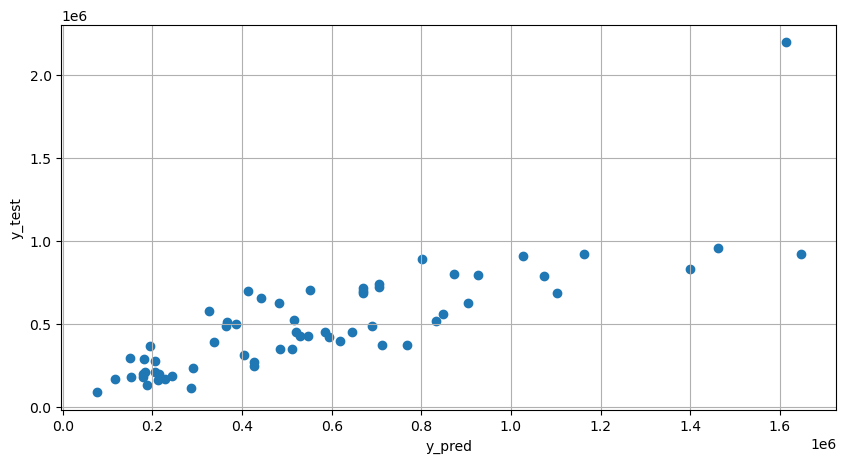

In [98]:
# See y_test and predictions scatter plot
y_pred = linear_model.predict(X_test)
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.grid()
plt.show()

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 161585.13996945164
MSE: 49009842368.2093
RMSE: 221381.6667391618


# Kfold cross-validation

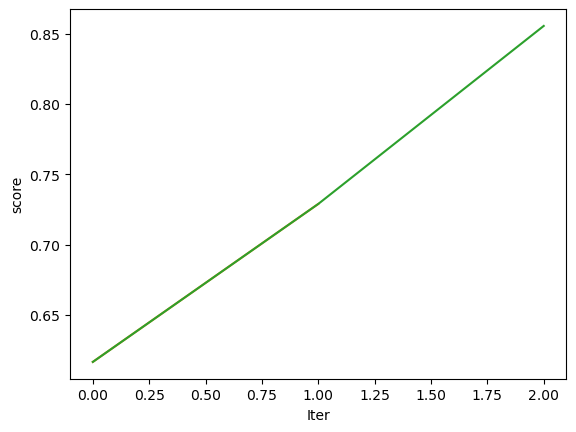

In [100]:
kf = KFold(3, shuffle=True, random_state=8)
results=[]
plt.figure()
for train_index, test_index in kf.split(X_train):
    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    X_train_kf, X_test_kf = X_train[train_index], X_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    model = LinearRegression().fit(X_train_kf, y_train_kf)
    y_pred = model.predict(X_test_kf)
    results.append(metrics.r2_score(y_test_kf, y_pred))
    plt.plot(results)
plt.ylabel('score')
plt.xlabel('Iter')
plt.show()

In [101]:
print(f'Mean score:{np.mean(results)}\nMax score:{max(results)}\nMin score:{min(results)}')

Mean score:0.7337304095911494
Max score:0.855463365502032
Min score:0.6167404229617544


In [104]:
print(metrics.r2_score(model.predict(X_test), y_test))

0.6461060905865867
